<a href="https://colab.research.google.com/github/marcelocanno/RobotAlive/blob/main/ELT_574_Semana_02_Trabalho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ELT 574 - Aprendizado de Maquinas -**

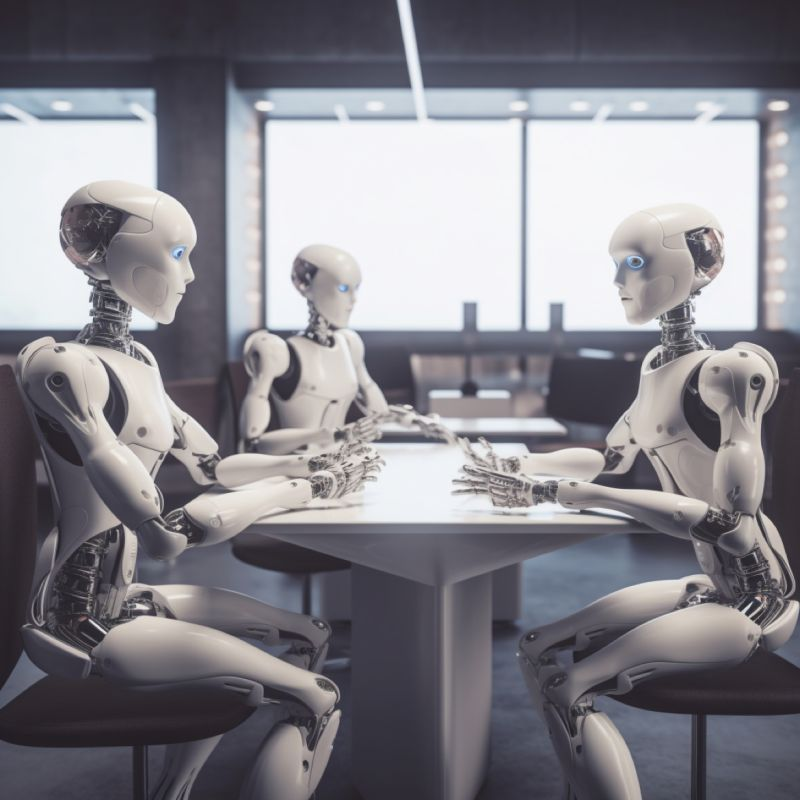

## **ELT 574 Semana 2 110983**

Conceito de Margem e Vetor de Suporte em SVM:

**Margem em SVM:**

A margem em SVM refere-se à distância entre o hiperplano de separação (a linha que divide as classes) e os pontos de dados mais próximos de ambas as classes. O objetivo principal do SVM é maximizar essa margem.
A margem rígida é a distância máxima entre o hiperplano de separação e os pontos de dados mais próximos, e a margem suave (soft margin) permite uma certa flexibilidade, permitindo erros de classificação.

**Vetor de Suporte:**

Os vetores de suporte são os pontos de dados que estão mais próximos do hiperplano de separação e têm um papel crucial no SVM.
Esses pontos de dados determinam a margem, e o classificador SVM é altamente dependente deles para a definição da fronteira de decisão.
Os vetores de suporte são os pontos de dados que ficam na margem ou violam a margem (em caso de margem suave).
Análise do Dataset Iris e Implementação dos Modelos:

* **Tipo de Problema:**
O dataset Iris pretende resolver um problema de classificação, onde o objetivo é classificar diferentes espécies de flores de íris com base em medidas de suas pétalas e sépalas.

* **Variáveis Alvo:**
A variável alvo desejada é a espécie da flor de íris (setosa, versicolor ou virginica). No exemplo, utilizaremos somente duas(setosa, versicolor).

* **Amostras e Dados:**
O dataset Iris contém 150 amostras e 4 variáveis (features).

* **Nomes das Variáveis:**
As variáveis presentes no dataset são: 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', e 'petal width (cm)'.

* **Natureza das Variáveis:**
As variáveis 'sepal length', 'sepal width', 'petal length' e 'petal width' são todas quantitativas e contínuas.
A variável alvo (espécie da íris) é qualitativa e nominal.

* **Dados Faltantes ou Inválidos:**
Pelo geral, o dataset Iris é limpo e não contém dados faltantes ou inválidos.

* **Relação e Dispersão das Variáveis:**
Uma análise de dispersão pode ser realizada para entender como as variáveis se relacionam entre si. Por exemplo, gráficos de dispersão podem ajudar a identificar tendências.
Para verificar a relação em relação à variável alvo, você pode usar gráficos boxplot ou outros métodos de visualização.

* **Modelo de SVM com Margens Rígidas:**
O modelo de SVM com margens rígidas procura encontrar um hiperplano que maximize a margem entre as classes.
A adição do ponto [2.5, 1.1] do tipo Iris setosa afetará a margem rígida da SVM. Dependendo da localização desse ponto, a margem rígida pode ser violada e o hiperplano de separação será ajustado.

* **Modelos de SVM com Margens Suaves (C=1, 10, 100, 1000):**
À medida que o valor de C aumenta, a margem suave se torna mais rígida, e o modelo se torna mais sensível a outliers. Valores mais baixos de C permitem uma margem suave mais ampla, enquanto valores mais altos de C reduzem a margem.

* **Modelos de SVM não lineares com Kernels Polinomial e Gaussiano:**
A aplicação de kernels polinomiais ou gaussianos permite que o SVM capture relações não lineares entre as features. O hiperplano de separação se torna mais complexo em comparação com o SVM linear.

* **Modelo de SVM com Kernel Gaussiano (gamma e C variados):**
Aumentar o valor de gamma torna o modelo mais sensível aos pontos de dados próximos, criando uma fronteira de decisão mais irregular.
Aumentar o valor de C torna a margem mais rígida, o que pode aumentar a tendência de overfitting.

Em resumo, as SVMs são eficazes em problemas de classificação, com flexibilidade para lidar com diferentes tipos de dados e relações entre variáveis. A escolha dos hiperparâmetros, como C e gamma, afeta a margem e a capacidade do modelo de se ajustar aos dados. A análise e escolha desses parâmetros dependem da natureza do problema e dos dados.


### **Preparando Ambiente de execução e Bibliotecas**

In [1]:
# Importando as bibliotecas para análise do problema e configurando o notebook
import os

from google.colab import drive
drive.mount('/content/drive')

import numpy as np

import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('xtick', labelsize=12)

import seaborn as sns

from sklearn import datasets
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from matplotlib import axes
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_classification
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures


print('setup completo')

Mounted at /content/drive
setup completo


## **Exercicio extra aplicando diversos aprendizados**

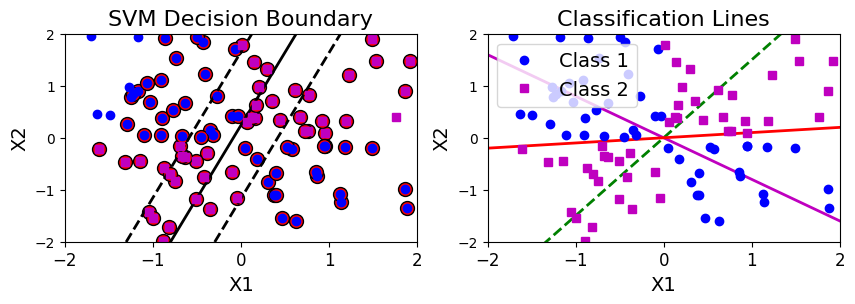

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Gere alguns dados de amostra
np.random.seed(0)
X = np.random.randn(100, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# Crie um classificador SVM com um kernel linear
svm_clf = SVC(kernel="linear", C=1e5)
svm_clf.fit(X, Y)

# Crie uma função para traçar o limite de decisão
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]

    margin = 1 / np.linalg.norm(w)
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_

    plt.scatter(svs[:, 0], svs[:, 1], s=100, facecolors='r', edgecolors='k')  # Plot support vectors in red
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

# Plotando
plt.figure(figsize=(10, 2.7))

# Plot decisão
plt.subplot(121)
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.plot(X[:, 0][Y], X[:, 1][Y], "bo")
plt.plot(X[:, 0][~Y], X[:, 1][~Y], "ms")

plt.xlabel("X1", fontsize=14)
plt.ylabel("X2", fontsize=14)
plt.title("SVM Decision Boundary", fontsize=16)
plt.axis([-2, 2, -2, 2])

# Plot de Classificação de pontos de dados
plt.subplot(122)

# Crie alguns exemplos de linhas de classificação
x0 = np.linspace(-2, 2, 200)
pred_1 = 1.5 * x0
pred_2 = -0.8 * x0
pred_3 = 0.1 * x0

plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)

plt.plot(X[:, 0][Y], X[:, 1][Y], "bo", label="Class 1")
plt.plot(X[:, 0][~Y], X[:, 1][~Y], "ms", label="Class 2")

plt.xlabel("X1", fontsize=14)
plt.ylabel("X2", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-2, 2, -2, 2])
plt.title("Classification Lines", fontsize=16)

plt.show()


In [14]:
from sklearn import svm
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline  # biblioteca para executar sequencia de codigo repetitivos
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # iris virginica

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=41))
  ])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=41))])

In [16]:
#Testando a classificação de uma amostra na SVM
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [17]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Gere um conjunto de dados de exemplo para treinar a SVM
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=1)

# Normalize os dados
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Treine a SVM
svm_clf = SVC(kernel='linear')
svm_clf.fit(X, y)

# Classifique a amostra
sample_to_classify = scaler.transform([[5.5, 1.7]])
predicted_class = svm_clf.predict(sample_to_classify)

print(f"Classe prevista: {predicted_class}")


Classe prevista: [1]


# **Questões 5 - 6**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Carregar o dataset Iris
iris = datasets.load_iris()
# Usando apenas as características 'petal length' e 'petal width'
X = iris.data[:, 2:4]
y = iris.target

# Modelo de SVM com Margens Rígidas
svm_rigido = SVC(kernel='linear', C=float(1e9))  # C infinito para margens rígidas
svm_rigido.fit(X, y)

# Adicionar o ponto [2.5, 1.1] do tipo Iris setosa
novo_ponto = np.array([[2.5, 1.1]])
svm_rigido.predict(novo_ponto)

# Modelos de SVM com Margens Suaves (C=1, 10, 100, 1000)
C_values = [1, 10, 100, 1000]
svm_suave = []

for C in C_values:
    svm = SVC(kernel='linear', C=C)
    svm.fit(X, y)
    svm_suave.append(svm)

# Modelos de SVM não lineares com Kernels Polinomial e Gaussiano
svm_polynomial = SVC(kernel='poly', degree=3)
svm_gaussiano = SVC(kernel='rbf')
svm_polynomial.fit(X, y)
svm_gaussiano.fit(X, y)

# Modelo de SVM com Kernel Gaussiano (gamma e C variados)
gamma_values = [0.1, 1, 10]
C_values = [1, 10, 100, 1000]
svm_gamma_c = []

for gamma in gamma_values:
    for C in C_values:
        svm = SVC(kernel='rbf', gamma=gamma, C=C)
        svm.fit(X, y)
        svm_gamma_c.append(svm)


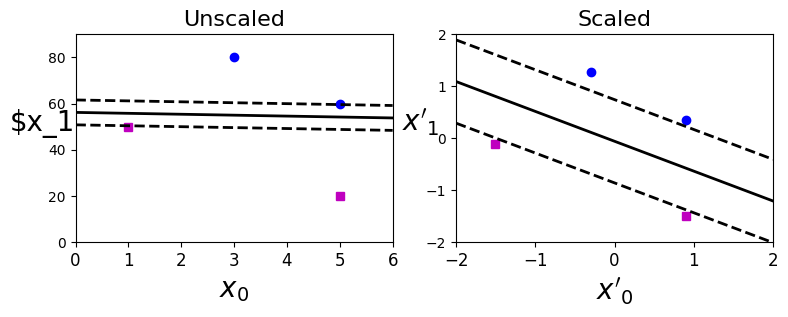

In [12]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Criando dados
xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])

# Crie um classificador SVM com kernel linear e alta regularização (C = 100)
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(xs, ys)

# Crie uma função para traçar o limite de decisão
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]
    margin = 1 / np.linalg.norm(w)
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

# Criando Plot
plt.figure(figsize=(9, 2.7))

# Plot escala de dados
plt.subplot(121)
plt.plot(xs[:, 0][ys == 1], xs[:, 1][ys == 1], "bo")
plt.plot(xs[:, 0][ys == 0], xs[:, 1][ys == 0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)

plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

# Escala de dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(xs)

# Ajustar o SVM aos dados dimensionados
svm_clf.fit(x_scaled, ys)

#Plote os dados dimensionados
plt.subplot(122)
plt.plot(x_scaled[:, 0][ys == 1], x_scaled[:, 1][ys == 1], 'bo')
plt.plot(x_scaled[:, 0][ys == 0], x_scaled[:, 1][ys == 0], 'ms')
plot_svc_decision_boundary(svm_clf, -2, 2)

plt.xlabel("$x'_0$", fontsize=20)
plt.ylabel("$x'_1$", fontsize=20, rotation=0)

plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

plt.show()



In [ ]:
# Inserindo outliers no espaço de caracteristicas do dataset iris
X_outliers = np.array([[2.5, 1.1],[3.2, 0.8]])    #  ---> Alteração para (2.5 e 1.2) setosa
y_outliers = np.array([0, 0])

# Concatenando os dados dos outliers aos dados do problema
xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

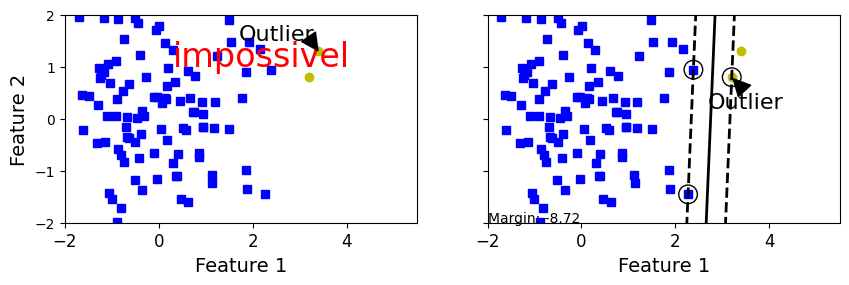

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Gerando dados
np.random.seed(0)
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])  ## -->> alteração 2.5 / 1.1
X_inliers = np.random.randn(100, 2)
X = np.vstack([X_inliers, X_outliers])
Y = np.array([0] * 100 + [1] * 2)

# Criando e ajustando o modelo de SVM linear de margem rígida
svm_clf2 = SVC(kernel="linear", C=100)  # -->> alteração 1, 10, 100, 1000.
svm_clf2.fit(X, Y)

fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

plt.sca(axes[0])
plt.plot(X_inliers[:, 0], X_inliers[:, 1], "bs")
plt.plot(X_outliers[:, 0], X_outliers[:, 1], "yo")

plt.text(0.3, 1.0, "impossivel", fontsize=24, color="red")

plt.xlabel("Feature 1", fontsize=14)
plt.ylabel("Feature 2", fontsize=14)

plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.5),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
             )
plt.axis([-2, 5.5, -2, 2])

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='none', edgecolors='k')  # Identifica os vetores de suporte
    plt.plot(x0, decision_boundary, "k-", linewidth=2)  # Hiperplano de suporte
    plt.plot(x0, gutter_up, "k--", linewidth=2)  # Vetor de suporte +1
    plt.plot(x0, gutter_down, "k--", linewidth=2)  # Vetor de suporte -1
    plt.annotate('Margin: {:.2f}'.format(margin), (xmin, xmin))  # Exibe o valor da margem de separação

plt.sca(axes[1])
plt.plot(X_inliers[:, 0], X_inliers[:, 1], "bs")
plt.plot(X_outliers[:, 0], X_outliers[:, 1], "yo")

plot_svc_decision_boundary(svm_clf2, -2, 5.5)

plt.xlabel("Feature 1", fontsize=14)

plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.5, 0.2),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
             )
plt.axis([-2, 5.5, -2, 2])

plt.show()


## questão 7

In [ ]:
# Inserindo outliers no espaço de caracteristicas do dataset iris
X_outliers = np.array([[2.5, 1.1],[3.2, 0.8]])    #  ---> Alteração para (2.5 e 1.2) setosa
y_outliers = np.array([0, 0])

# Concatenando os dados dos outliers aos dados do problema
xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

In [ ]:
# Configurando diferentes SVMs de margens suaves, com C = 1 e C = 100
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42) # funcao de perda do classificador
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42) # loss = 'hinge' funciona melhor para o classificador linear

#Pipeline de transformacoes em cada uma
scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

## **Questão 8**

## kermel

In [ ]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=200)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

In [ ]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

In [ ]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

plt.show()